<a href="https://colab.research.google.com/github/ProgrammingWithGaurav/DogVsCatDL/blob/main/Dog_Vs_Cat_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# Configure
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats

 98% 798M/812M [00:08<00:00, 213MB/s]
100% 812M/812M [00:08<00:00, 99.2MB/s]


In [7]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [8]:
# Extract the compressed file
from zipfile import ZipFile
dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

In [9]:
# Extract the compressed file
from zipfile import ZipFile
dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

In [12]:
import os
# count the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
file_count

25000

In [13]:
# Printing the name of the images
file_names = os.listdir('/content/train')
file_names

['cat.8615.jpg',
 'dog.10939.jpg',
 'dog.3833.jpg',
 'cat.5776.jpg',
 'dog.11229.jpg',
 'dog.9510.jpg',
 'cat.8130.jpg',
 'dog.42.jpg',
 'cat.1925.jpg',
 'dog.162.jpg',
 'dog.11545.jpg',
 'dog.7583.jpg',
 'cat.9976.jpg',
 'cat.11491.jpg',
 'cat.664.jpg',
 'cat.11009.jpg',
 'cat.17.jpg',
 'dog.12105.jpg',
 'dog.6152.jpg',
 'dog.123.jpg',
 'cat.2675.jpg',
 'cat.11870.jpg',
 'dog.575.jpg',
 'cat.5914.jpg',
 'dog.6742.jpg',
 'dog.9460.jpg',
 'dog.10028.jpg',
 'cat.11627.jpg',
 'dog.4743.jpg',
 'dog.2081.jpg',
 'dog.1223.jpg',
 'dog.8037.jpg',
 'cat.174.jpg',
 'dog.7438.jpg',
 'cat.9648.jpg',
 'cat.11819.jpg',
 'dog.2343.jpg',
 'cat.9692.jpg',
 'cat.9796.jpg',
 'cat.4963.jpg',
 'cat.5789.jpg',
 'dog.10914.jpg',
 'dog.7664.jpg',
 'dog.10451.jpg',
 'cat.1353.jpg',
 'dog.10738.jpg',
 'cat.6060.jpg',
 'cat.12208.jpg',
 'cat.4326.jpg',
 'dog.9151.jpg',
 'cat.807.jpg',
 'dog.2239.jpg',
 'cat.6939.jpg',
 'dog.10372.jpg',
 'cat.5056.jpg',
 'cat.12393.jpg',
 'dog.1720.jpg',
 'cat.6825.jpg',
 'cat.10

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

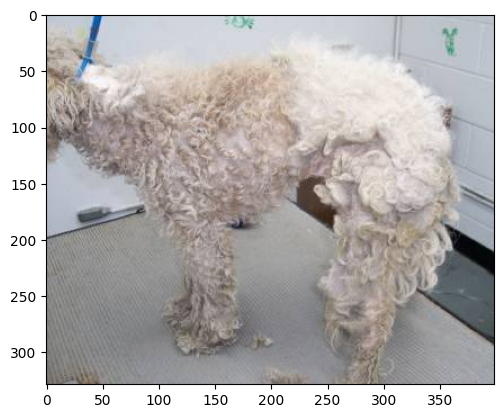

In [19]:
# Displaying the Images of Dog
img = mpimg.imread('/content/train/dog.6287.jpg')
imgplt = plt.imshow(img)
plt.show()

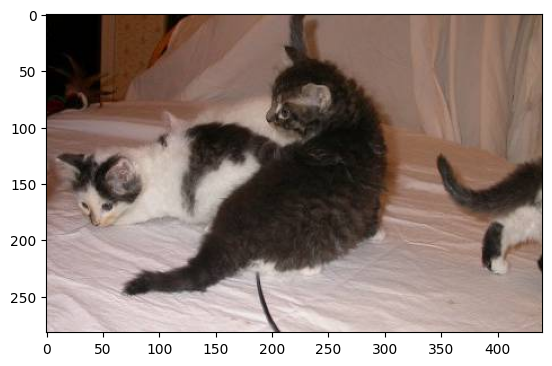

In [20]:
# Displaying the Images of Cat
img = mpimg.imread('/content/train/cat.10564.jpg')
imgplt = plt.imshow(img)
plt.show()

In [26]:
# Resizing The Images
file_nams = os.listdir('/content/train')
for i in range(5):
  name = file_names[i]
  print(name[0:3])


cat
dog
dog
cat
dog


In [28]:
file_names = os.listdir('/content/train/')
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name=='dog':
    dog_count += 1
  else:
    cat_count += 1

In [29]:
dog_count, cat_count

(12500, 12500)

In [30]:
# creating a director for resized images
os.mkdir('/content/image resized')

In [36]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

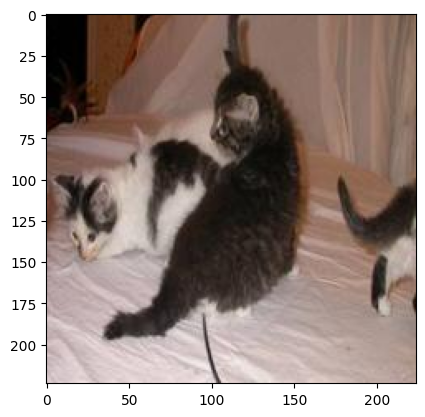

In [38]:
img = mpimg.imread('/content/image resized/cat.10564.jpg')
imgplt = plt.imshow(img)
plt.show()

In [39]:
file_names = os.listdir('/content/image resized/')
# Cat = 0
# Dog = 1
labels = []
for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if(label == 'dog'):
    labels.append(1)
  else:
    labels.append(0)

In [43]:
labels[0:5]

[0, 1, 1, 0, 1]

In [42]:
print(file_names[0:5])

['cat.8615.jpg', 'dog.10939.jpg', 'dog.3833.jpg', 'cat.5776.jpg', 'dog.11229.jpg']


In [45]:
values, counts = np.unique(labels, return_counts=True)
values, counts

(array([0, 1]), array([ 978, 1022]))

In [46]:
import cv2
import glob

In [55]:
image_directory = '/content/image resized/'
image_extension =  ['png', 'jpg']
# glob.glob() is a function from the glob module that returns a list of all of the files that match a given pattern.
files =[]
[files.extend(glob.glob(image_directory + '*.' + ext)) for ext in image_extension]
# reading each image and converting to numpy array
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [56]:
dog_cat_images

array([[[[ 25,  26,  36],
         [ 20,  21,  31],
         [ 20,  18,  30],
         ...,
         [ 39,  67,  68],
         [ 76, 104, 105],
         [ 52,  80,  80]],

        [[ 25,  26,  36],
         [ 20,  21,  31],
         [ 21,  19,  31],
         ...,
         [ 53,  81,  82],
         [ 87, 115, 116],
         [113, 144, 143]],

        [[ 25,  27,  37],
         [ 20,  22,  32],
         [ 19,  19,  31],
         ...,
         [ 58,  88,  89],
         [ 62,  92,  93],
         [116, 148, 147]],

        ...,

        [[255, 166, 236],
         [255, 167, 237],
         [255, 173, 243],
         ...,
         [255, 253, 255],
         [255, 253, 255],
         [255, 254, 255]],

        [[255, 168, 237],
         [255, 166, 235],
         [255, 170, 238],
         ...,
         [255, 252, 255],
         [255, 252, 255],
         [255, 253, 255]],

        [[255, 170, 239],
         [255, 166, 235],
         [253, 166, 234],
         ...,
         [255, 252, 255],
        

In [59]:
X = dog_cat_images
Y = np.asarray(labels)

In [74]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.1, random_state=42)

In [61]:
# feature scaling
# converting b/w range 0 and 1
X_train_scaled = x_train/255
X_test_scaled = x_test/255

In [64]:
import tensorflow as tf
import tensorflow_hub as hub

In [68]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [69]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes) # hidden layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [70]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'] # accuracy
)

In [72]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
57/57 [==============================] - 50s 836ms/step - loss: 0.2032 - acc: 0.9194
Epoch 2/5
57/57 [==============================] - 39s 678ms/step - loss: 0.0621 - acc: 0.9850
Epoch 3/5
57/57 [==============================] - 43s 756ms/step - loss: 0.0466 - acc: 0.9883
Epoch 4/5
57/57 [==============================] - 39s 683ms/step - loss: 0.0390 - acc: 0.9894
Epoch 5/5
57/57 [==============================] - 53s 945ms/step - loss: 0.0315 - acc: 0.9939


In [75]:
score, acc = model.evaluate(X_test_scaled, y_test)
score, acc

7/7 [==============================] - 5s 688ms/step - loss: 0.0590 - acc: 0.9750


(0.05895668640732765, 0.9750000238418579)

# Predictive System

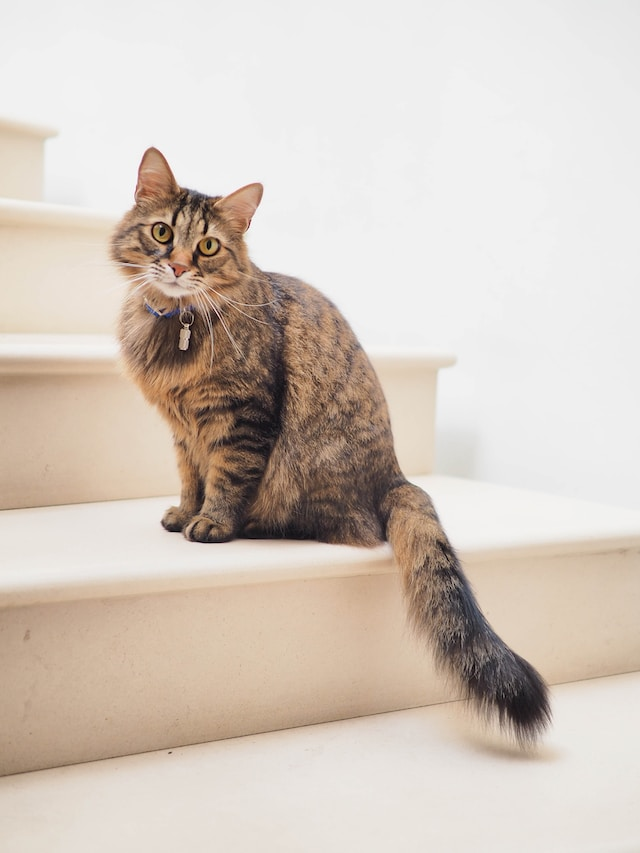

1/1 [==============================] - 0s 107ms/step


In [93]:
# @title Image Path
input_image_path = "/content/Test2.jpg" # @param {type:"string"}

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize/255
input_image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_pred = model.predict(input_image_reshaped)
pred = np.argmax(input_pred)


In [94]:
"Cat" if pred == 0 else "Dog"

'Cat'